## Observations and Insights 

In [68]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="left")


# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [69]:
# Checking the number of mice.
mice_count = combine_data.shape[0]
print(mice_count)

deduped_mice_count= combine_data["Mouse ID"].nunique()
print(deduped_mice_count)



1893
249


In [70]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# dupe_mice_count = combined_data[combined_data.duplicated(["Mouse ID"])]
# dupe_mice_count.head()

dupe_mice=combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
dupe_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [71]:
# Optional: Get all the data for the duplicate mouse ID. 

# dupe_mice= combined_data[combined_data.loc[combined_data["Mouse ID"]=="g989"""]
                         

In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data_drop = combined_data.drop_duplicates(subset="Mouse ID", keep="last")
print(combined_data_drop.shape[0])
combined_data_drop.head()


249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [73]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = combined_data_drop.shape[0]
print(clean_mice_count)


249


## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_tumor = combined_data_drop.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = combined_data_drop.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = combined_data_drop.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor = combined_data_drop.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = combined_data_drop.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary = pd.DataFrame({"Mean- Tumor Volume": mean_tumor,
                              "Median- Tumor Volume": median_tumor,
                              "Variance - Tumor Volume": var_tumor,
                              "STD - Tumor Volume" :std_tumor, 
                              "SEM - Tumor Volume" :sem_tumor})


summary


,Mean- Tumor Volume,Median- Tumor Volume,Variance - Tumor Volume,STD - Tumor Volume,SEM - Tumor Volume
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_reg_total = pd.DataFrame(pd.value_counts(combined_data["Drug Regimen"]))
drug_reg_total

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


## Bar and Pie Charts

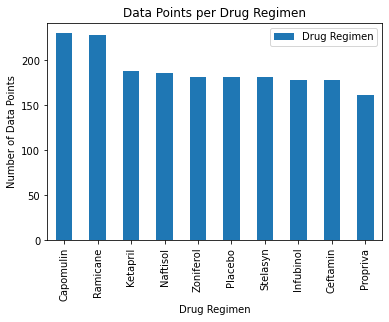

<Figure size 432x288 with 0 Axes>

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_reg_total.plot(kind="bar")
plt.title("Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

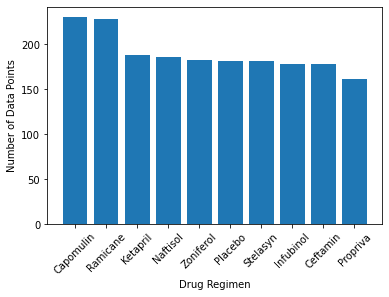

In [77]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = combined_data["Drug Regimen"].value_counts().index
y_axis = combined_data["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()


In [80]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_v_female = pd.value_counts(combined_data_drop['Sex'])
male_v_female

#still need a pie chart!!!!

Male      125
Female    124
Name: Sex, dtype: int64

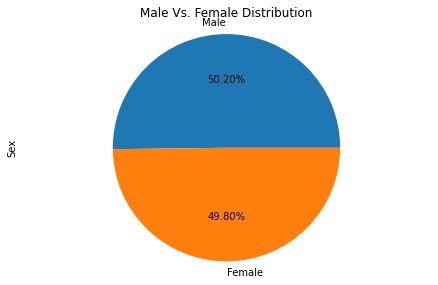

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_v_female_pandas= male_v_female.plot(kind="pie", y="Sex", autopct="%1.2f%%", title="Male Vs. Female Distribution")
male_v_female_pandas.set_ylabel ("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
